In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.reset_defaults()
%load_ext autoreload
%autoreload 2

# IDM

In [28]:
f_s0 = lambda s0, v0, T, omega, d, delta, v, lv, s, **kwargs: -2 * omega * (s0 + v * T + v * (v - lv) / (2 * np.sqrt(omega * delta))) / (s ** 2)
f_v0 = lambda s0, v0, T, omega, d, delta, v, lv, s, **kwargs: delta * omega * np.power(v, delta) / np.power(v0, delta + 1)
f_T = lambda s0, v0, T, omega, d, delta, v, lv, s, **kwargs: -2 * omega * (s0 + v * T + v * (v - lv) / (2 * np.sqrt(omega * delta))) * v / (s ** 2)
f_omega = lambda s0, v0, T, omega, d, delta, v, lv, s, **kwargs: (1 - np.power(v / v0, delta)) - (s0 + v * T + v * (v - lv) / (2 * np.sqrt(omega * delta))) * (s0 + v * T) / (s ** 2)
f_d = lambda s0, v0, T, omega, d, delta, v, lv, s, **kwargs: (2 * np.sqrt(omega * d) * (s0 + v * T) + v * (v - lv)) * v * (v - lv) / (4 * np.power(s * d, 2))
f_delta = lambda s0, v0, T, omega, d, delta, v, lv, s, **kwargs: - omega * np.power(v / v0, delta) * np.log(v / v0)

In [2]:
from trasim_simplified.util.calibrate.clb_cf_model import cf_param_ranges
from trasim_simplified.util.calibrate.clb_cf_model import cf_param_types
from trasim_simplified.core.constant import CFM

cf_name = CFM.ACC
# param_names = ["s0", "v0", "T", "omega", "d", "delta"]
param_names = ["k1", "k2", "thw", "s0"]

Using geatpy


In [3]:
param_df: pd.DataFrame = pd.read_pickle(r"E:\PyProject\car-following-model-test\tests\data\clb_dec_acc_param_df" + f"_{cf_name}.pkl")
cf_param = param_df[param_names].describe().loc["mean"].to_dict()
cf_param = {param_name: (round(cf_param[param_name]) if cf_param_types[cf_name][param_name] == 1 else cf_param[param_name]) for param_name in param_names}
cf_param

{'k1': 0.24171344935894012,
 'k2': 0.4928579360246658,
 'thw': 1.473714530467987,
 's0': 4.5977044105529785}

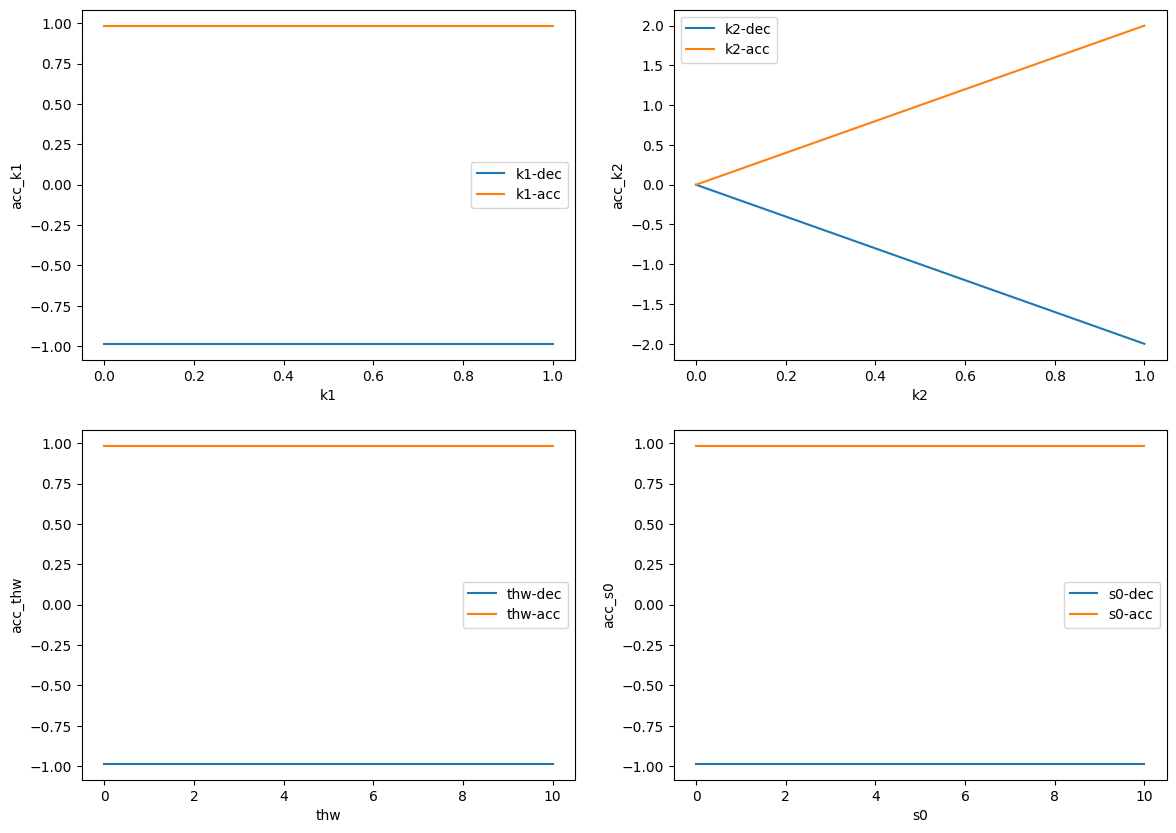

In [7]:
from trasim_simplified.core.kinematics.cfm import get_cf_equilibrium, get_cf_func

cf_e = get_cf_equilibrium(cf_name)
cf_func = get_cf_func(cf_name)
param_ranges = cf_param_ranges[cf_name]

fig, ax = plt.subplots(int(np.ceil(len(param_names) / 2)), 2, figsize=(14, 5 * int(np.ceil(len(param_names) / 2))))
ax: list[plt.Axes] = ax.flatten()

for i, param_name in enumerate(param_names):
    param_range = np.linspace(param_ranges[param_name][0], param_ranges[param_name][1], 10) if cf_param_types[cf_name][param_name] == 0 else np.round(np.linspace(1, param_ranges[param_name][1], 10))
    
    cf_param_copy = cf_param.copy()
    cf_param_copy.update({param_name: param_range})
    
    ax[i].plot(param_range, cf_func(**cf_param_copy, speed=10, leaderV=8, gap=cf_e(**cf_param_copy, speed=10)), label=f"{param_name}-dec")
    ax[i].plot(param_range, cf_func(**cf_param_copy, speed=5, leaderV=7, gap=cf_e(**cf_param_copy, speed=5)), label=f"{param_name}-acc")
    ax[i].legend()
    ax[i].set_xlabel(param_name)
    ax[i].set_ylabel(f"acc_{param_name}")
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\begin_acc" + f"_{cf_name}.png")

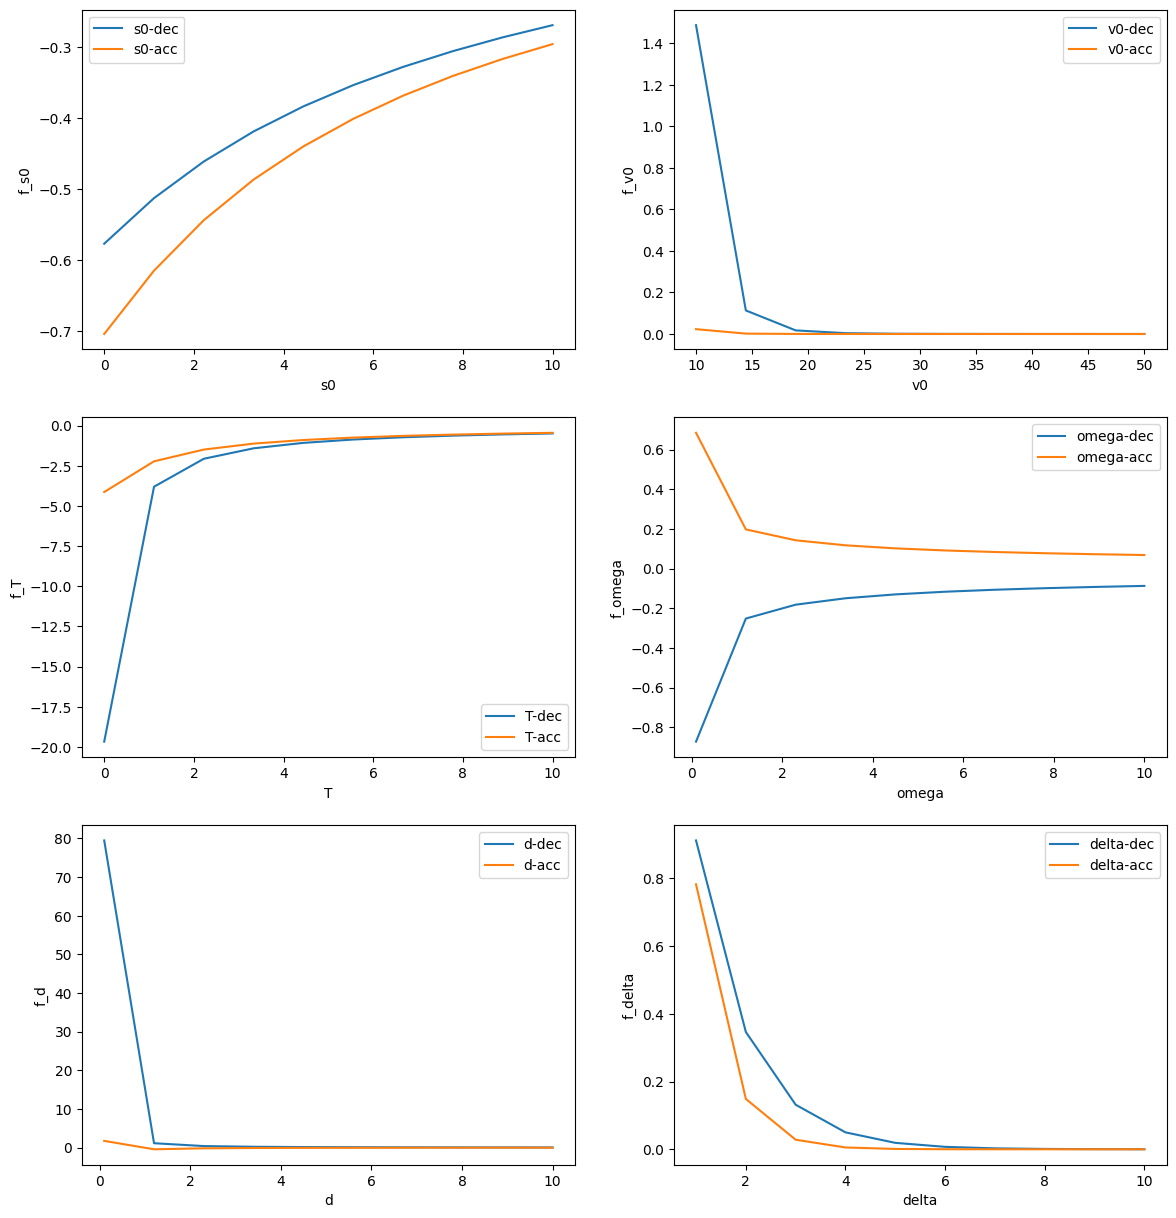

In [33]:
from trasim_simplified.core.kinematics.cfm import get_cf_equilibrium, get_cf_func

cf_e = get_cf_equilibrium(cf_name)
cf_func = get_cf_func(cf_name)

fig, ax = plt.subplots(3, 2, figsize=(14, 15))
ax: list[plt.Axes] = ax.flatten()
for i, param_name in enumerate(param_names):
    param_range = np.linspace(param_ranges[param_name][0], param_ranges[param_name][1], 10) if cf_param_types[cf_name][param_name] == 0 else np.round(np.linspace(1, param_ranges[param_name][1], 10))

    cf_param_copy = cf_param.copy()
    cf_param_copy.update({param_name: param_range})

    func = eval(f"f_{param_name}")

    ax[i].plot(param_range, func(**cf_param_copy, v=10, lv=8, s=cf_e(**cf_param_copy, speed=10)), label=f"{param_name}-dec")
    ax[i].plot(param_range, func(**cf_param_copy, v=5, lv=7, s=cf_e(**cf_param_copy, speed=5)), label=f"{param_name}-acc")
    ax[i].legend()
    ax[i].set_xlabel(param_name)
    ax[i].set_ylabel(f"f_{param_name}")
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\begin_acc_partial" + f"_{cf_name}.png")